# Social Network Analysis with NetworkX

Dataset: http://snap.stanford.edu/data/ego-Facebook.html

This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

Facebook data has been anonymised by replacing the Facebook-internal ids for each user with a new value. Also, while feature vectors from this dataset have been provided, the interpretation of those features has been obscured. For instance, where the original dataset may have contained a feature "political=Democratic Party", the new data would simply contain "political=anonymized feature 1". Thus, using the anonymized data it is possible to determine whether two users have the same political affiliations, but not what their individual political affiliations represent. 

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
Gfb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
print(nx.info(Gfb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [3]:
#create network layout for visualisations
spring_pos = nx.spring_layout(Gfb)

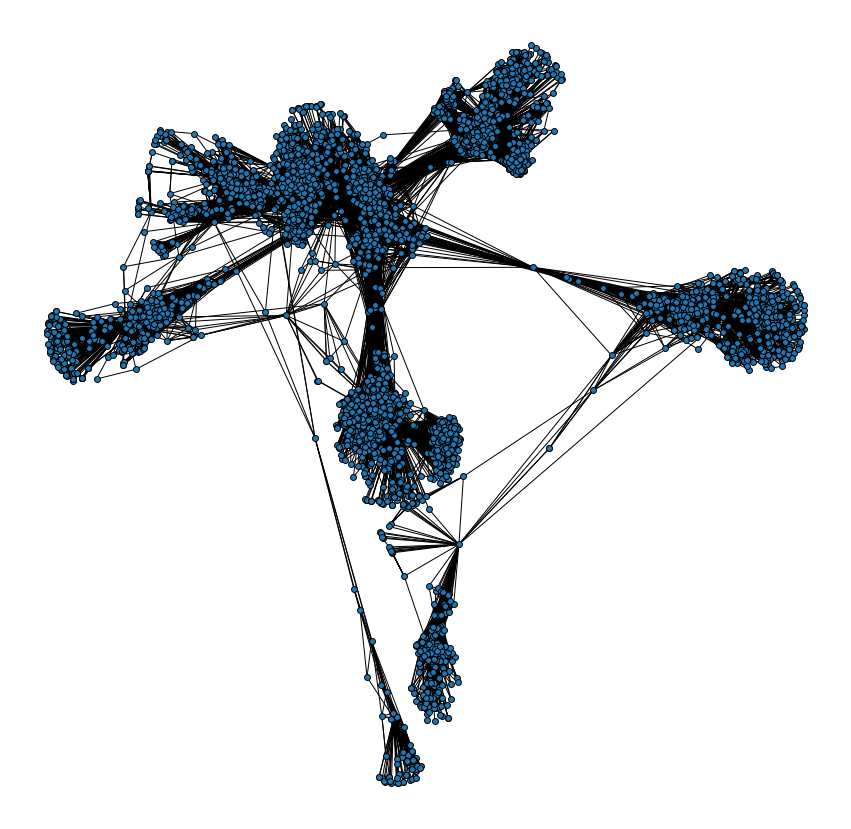

In [4]:
plt.figure(figsize=(15,15))
plt.axis("off")
nx.draw_networkx(Gfb, pos = spring_pos, with_labels = False, edgecolors='black', node_size = 35)

As shown by the diagram, this is a fairly connected network, and the number of edges in the network is more than 20x the number of nodes, so the network is densely clustered. Examining the network, certain hubs of vertices appear, which are an important feature of real-world social networks. Dense hubs represent high clustering and are often the result of underlying social mechanisms that are of interest to scientists.

## Centrality

### Betweenness Centrality

Determining the most “important” individual in the network depends on the definition of “important”. One way to define “importance” is the individual’s betweenness centrality. The betweenness centrality is a measure of how many shortest paths pass through a particular vertex. The more shortest paths that pass through the vertex, the more central the vertex is to the network.

(-0.9088868067671035,
 0.7443286941457962,
 -1.0987857749666219,
 1.044483320971871)

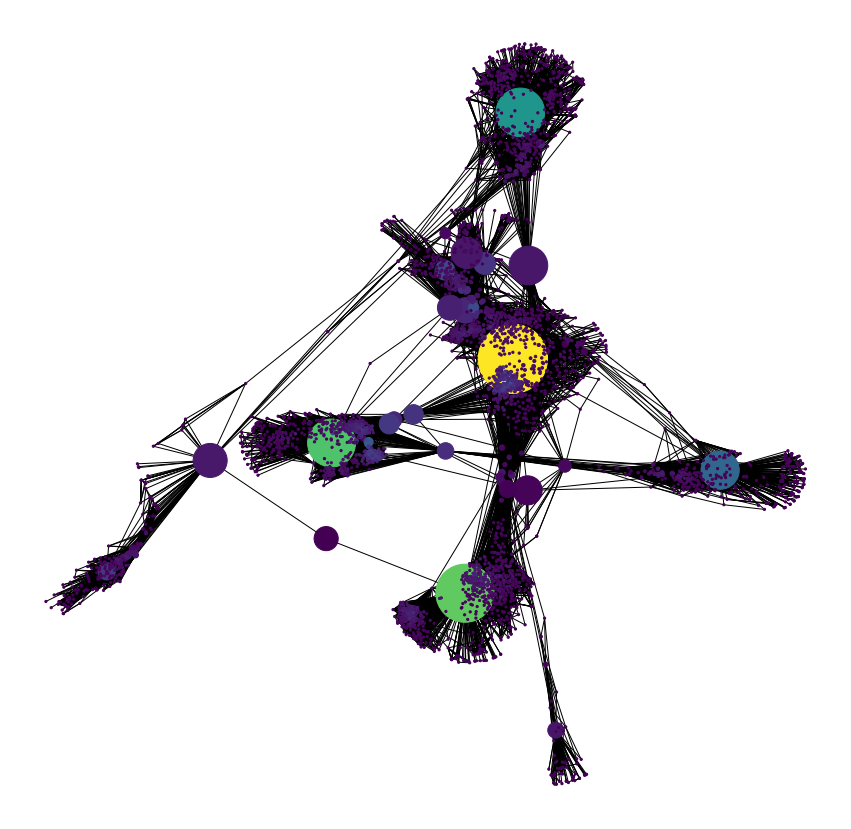

In [5]:
pos = nx.spring_layout(Gfb)
betCent = nx.betweenness_centrality(Gfb, normalized=True, endpoints=True)
node_color = [20000.0 * Gfb.degree(v) for v in Gfb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(Gfb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [6]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]

From the above, vertices that primarily either sit at the center of a hub or act as a bridge between two hubs have higher betweenness centrality. The bridge vertices have high betweenness as all paths connecting the hubs pass through them, and the hub center vertices have high betweenness because all intra-hub paths pass through them.

### Degree Centrality

An alternative way to look at importance is to consider degree centrality, or the number of links incident upon a node (i.e., the number of ties that a node has). The higher number of links a node has, the higher the level of importance.

(-1.0818097044139576,
 0.6973221957590279,
 -0.6725265535560074,
 1.0521344127735028)

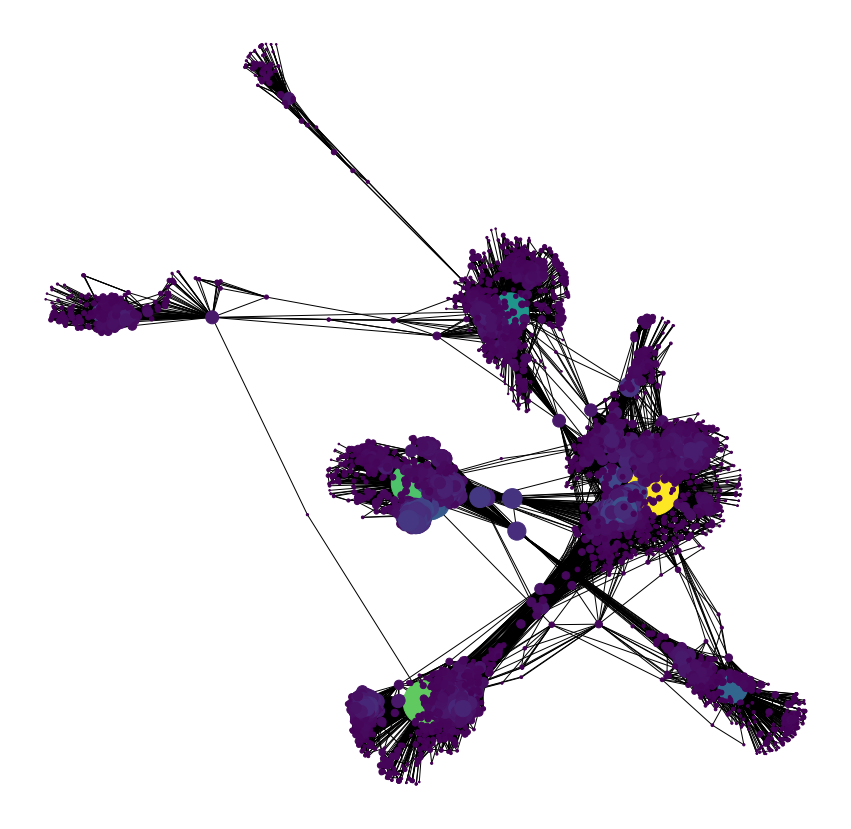

In [7]:
pos = nx.spring_layout(Gfb)
degCent = nx.degree_centrality(Gfb)
node_color = [20000.0 * Gfb.degree(v) for v in Gfb]
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(Gfb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [8]:
sorted(degCent, key=degCent.get, reverse=True)[:5]

[107, 1684, 1912, 3437, 0]

### Closeness Centrality

In a connected graph, the normalised closeness centrality (or closeness) of a node is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes. 

(-0.7769671026296203,
 1.1114606394671473,
 -0.8391436351421835,
 0.6729508574190386)

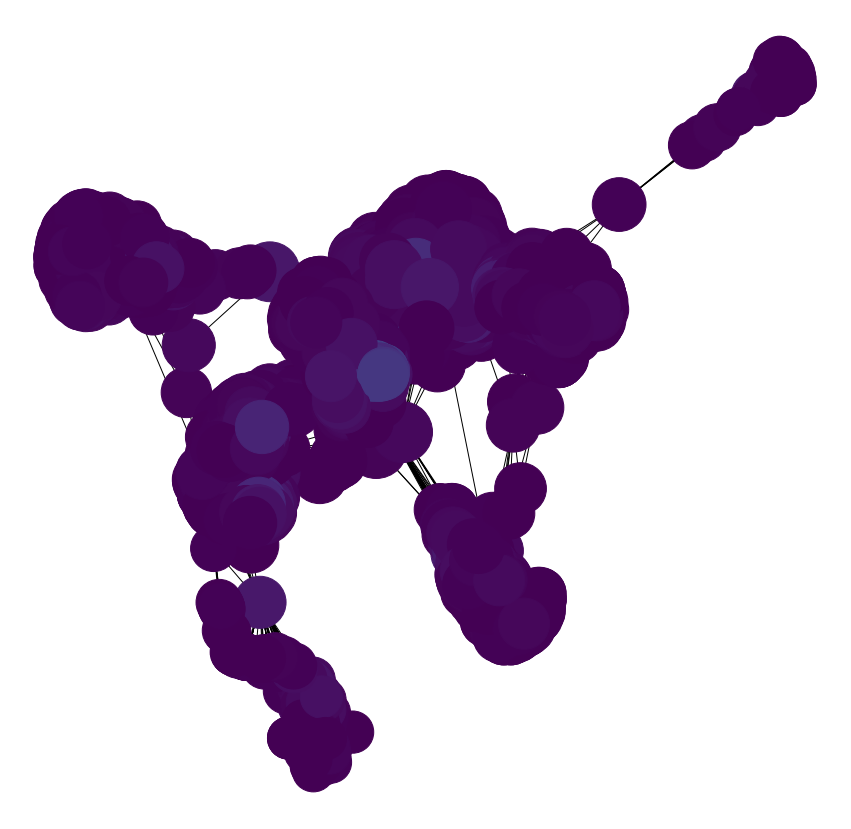

In [9]:
pos = nx.spring_layout(Gfb)
cloCent = nx.closeness_centrality(Gfb)
node_color = [20000.0 * Gfb.degree(v) for v in Gfb]
node_size =  [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(Gfb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [10]:
sorted(cloCent, key=cloCent.get, reverse=True)[:5]

[107, 58, 428, 563, 1684]

### Eigenvector Centrality

This is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

(-0.7450093020322963,
 1.08309674914648,
 -0.8106448652523918,
 0.6440400098018358)

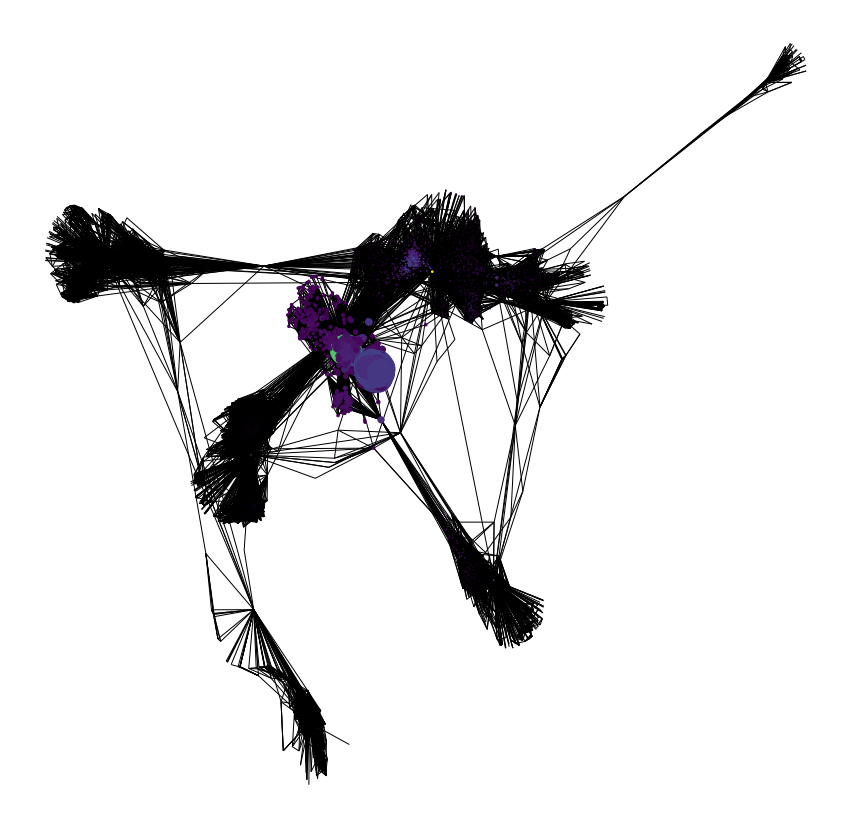

In [11]:
eigCent = nx.eigenvector_centrality(Gfb)
node_color = [20000.0 * Gfb.degree(v) for v in Gfb]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(Gfb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [12]:
sorted(eigCent, key=eigCent.get, reverse=True)[:5]

[1912, 2266, 2206, 2233, 2464]

## Community Detection

Facebook friends probably come from different aspects of a user's life: college, co-workers, family etc. 

Using community detection algorithms, a social network can be broken down into different potentially overlapping communities. The criteria for finding good communities is similar to that for finding good clusters. Intra-community edges need to be maximised, whilst inter-community edges minimised. Formally, the algorithm tries to maximise the modularity of network, or the fraction of edges that fall within the community minus the expected fraction of edges if the edges were distributed by random. Good communities should have a high number of intra-community edges, so by maximizing the modularity, we detect dense communities that have a high fraction of intra-community edges.

While there is no community detection method in NetworkX, someone has written a community detection library built on top of NetworkX.

In [13]:
import community

In [14]:
parts = community.best_partition(Gfb)
values = [parts.get(node) for node in Gfb.nodes()]

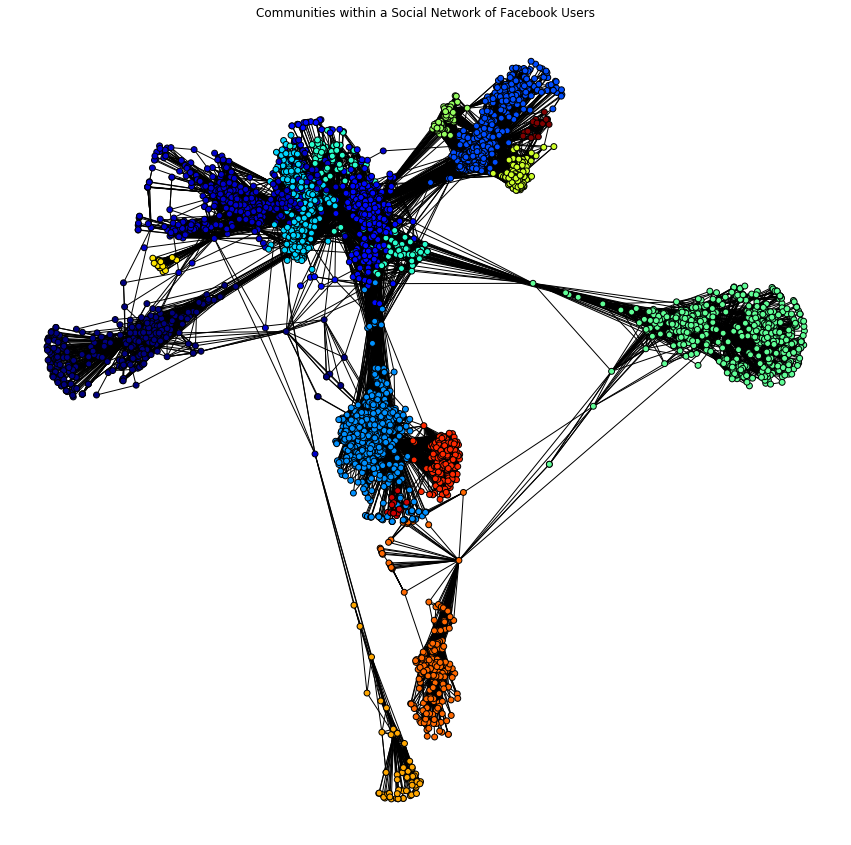

In [15]:
plt.figure(figsize=(15,15)) 
plt.title('Communities within a Social Network of Facebook Users')
plt.axis("off")
nx.draw_networkx(Gfb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, edgecolors = 'black', node_size = 35, with_labels = False)

As shown above, communities closely align with the vertex hubs. Because this dataset was compiled by aggregating the ego network of ten individuals, the different communities most likely reflect the different ego networks.